In [25]:
# Packages needed for plots and analysis. 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import itertools as it
import seaborn as sns
from pyrolite.plot import pyroplot
import plotly.express as px
from scipy import stats

In [26]:
# Main compounds by WDXRF, SEM-EDS and LA-ICP-MS
ms = pd.read_csv("./data_main_ms.csv", sep= ";",decimal = ".", na_values='-') 
mask = (ms["Material"] == "Sandstone") # mask to remove the sanstones 
ms = ms.drop(index = ms.loc[mask].index).reset_index(drop = True)
ms

,Unnamed: 0,Sample,Material,Spectrum,Technique,Na2O,MgO,Al2O3,SiO2,P2O5,K2O,CaO,MnO,FeO,TiO2,BaO,Fe203
0,0,MA-201419,Iron-SI,MA-201419-2- 1,SEM,0.32,2.37,10.66,67.12,0.01,2.89,10.33,2.93,2.850000,0.54,0.01,NaN
1,1,MA-201419,Iron-SI,MA-201419-2- 2,SEM,0.26,2.18,9.35,56.48,0.05,2.03,8.20,1.90,18.970000,0.40,0.18,NaN
2,2,MA-201419,Iron-SI,MA-201419-2- 3,SEM,0.17,2.32,10.70,63.10,0.01,3.80,9.03,3.71,6.050000,0.43,0.70,NaN
3,3,MA-201419,Iron-SI,MA-201419-2- 4,SEM,0.36,2.60,12.17,67.52,0.01,3.81,9.15,1.89,1.850000,0.58,0.07,NaN
4,4,MA-201419,Iron-SI,MA-201419-2- 5,SEM,0.08,2.23,11.22,64.26,0.01,3.26,8.00,1.13,9.140000,0.68,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,169,MA-201433,Ore,NaN,LA-ICP-MS,0.03,0.21,1.71,30.00,0.54,0.26,0.99,0.02,59.503774,0.21,NaN,66.13
168,170,MA-201434,Ore,NaN,LA-ICP-MS,0.08,0.65,6.28,17.40,0.24,1.85,0.81,8.30,57.128302,0.65,NaN,63.49
169,171,MA-201535,Ore,NaN,LA-ICP-MS,0.15,1.98,4.60,12.74,1.60,1.32,0.70,4.19,64.803596,1.98,NaN,72.02
170,172,MA-201912,Ore,NaN,LA-ICP-MS,0.04,0.30,4.90,26.58,0.20,0.70,0.14,0.04,59.647742,0.30,NaN,66.29


In [27]:
# 100% wtg normalization 
nor = ['Na2O', 'MgO', 'Al2O3', 'SiO2','P2O5', 'K2O', 'CaO', 'MnO', 'FeO','TiO2']

ms_nor = ms.loc[:, nor].div(ms.loc[:, nor].sum(axis = 1), axis = 0)*100
ms_nor["Material"] = ms["Material"]
ms_nor["Sample"] = ms["Sample"]
ms_nor

,Na2O,MgO,Al2O3,SiO2,P2O5,K2O,CaO,MnO,FeO,TiO2,Material,Sample
0,0.319936,2.369526,10.657868,67.106579,0.009998,2.889422,10.327934,2.929414,2.849430,0.539892,Iron-SI,MA-201419
1,0.260469,2.183931,9.366860,56.581847,0.050090,2.033661,8.214787,1.903426,19.004208,0.400721,Iron-SI,MA-201419
2,0.171164,2.335884,10.773258,63.532018,0.010068,3.826017,9.091824,3.735401,6.091422,0.432944,Iron-SI,MA-201419
3,0.360216,2.601561,12.177306,67.560536,0.010006,3.812287,9.155493,1.891135,1.851111,0.580348,Iron-SI,MA-201419
4,0.079992,2.229777,11.218878,64.253575,0.009999,3.259674,7.999200,1.129887,9.139086,0.679932,Iron-SI,MA-201419
...,...,...,...,...,...,...,...,...,...,...,...,...
167,0.032095,0.224662,1.829390,32.094564,0.577702,0.278153,1.059121,0.021396,63.658256,0.224662,Ore,MA-201433
168,0.085664,0.696019,6.724611,18.631884,0.256992,1.980976,0.867346,8.887623,61.172867,0.696019,Ore,MA-201434
169,0.159467,2.104959,4.890308,13.544028,1.700977,1.403306,0.744177,4.454433,68.893386,2.104959,Ore,MA-201535
170,0.043081,0.323110,5.277457,28.627514,0.215406,0.753922,0.150784,0.043081,64.242534,0.323110,Ore,MA-201912


In [28]:
#bar plots
features = list(ms_nor.columns)
features.remove("Sample")
features.remove("Material")
ele = []
for e in features:
    if not ("/" in e):
        ele.append(e)
elements=ele

materials = ["Ore","Oven Slag",
             "Flow Slag","Plate Slag","Smithing Slag",
             "Bloom","Iron-SI","Iron-SI-P" ]
el = "Y"
for el in elements:
    fig, ax = plt.subplots(1, figsize=(16,8))
    grouped = ms_nor[[el, "Material", "Sample"]].groupby("Material")
    #for name, group in grouped:
    for mat in materials:
        group = grouped.get_group(mat)
        x = group["Sample"] # problems with multisamples
        y = group[el] 
        ax.bar(x, y, label = group["Material"].iloc[0])
        ax.set_title(el)  
        ax.axes.xaxis.set_ticklabels([])  
    ax.legend()
    fig.savefig("./plots/bar_main/"+el+".png", dpi = 200)
    plt.close(fig)

In [29]:
#Boxplots
features = list(ms_nor.columns)
features.remove("Sample")
features.remove("Material")
ele = []
for e in features:
    if not ("/" in e):
        ele.append(e)
elements=ele
sns.set_style("whitegrid")
mats = ["Ore","Oven Slag",
             "Flow Slag","Plate Slag","Smithing Slag",
             "Bloom","Iron-SI","Iron-SI-P" ]
new_mats = ["Ore","Oven S.",
             "Flow S.","Plate S.","Smith. S.",
             "Bloom","Iron-SI","Iron-SI-P"]

for el in elements:
    fig, ax = plt.subplots(1, figsize=(12,8))
    sns.swarmplot(x = "Material", y = el, data = ms_nor[["Material", el]].replace(mats, new_mats), ax= ax, palette= "dark")
    sns.boxplot(x = "Material", y = el, data = ms_nor[["Material", el]].replace(mats, new_mats), palette= "pastel", ax = ax)
    sns.set_style("whitegrid")
    ax.set_xlabel("")
    ax.set_ylabel(el, fontsize=18)
    plt.tight_layout()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=16)
    fig.savefig("./plots/box_main/"+el+".png", dpi=200)
    plt.close(fig)

/home/marisa/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/marisa/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/marisa/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



In [30]:
# Biplots and linear correlation calculations 
main=['MgO', 'Al2O3', 'SiO2',
       'K2O', 'CaO', 'FeO', "P2O5"]

materials = ["Oven Slag",
             "Flow Slag","Plate Slag","Smithing Slag", "Bloom",
            "Iron-SI", "Iron-SI-P"]
colors = ["darkred","forestgreen",
          "darkorange","violet", "gold","olive","tab:blue"]
icon = ["v", "^", 
          "<", ">", "s",
          "D", "D"]

c_parameters = pd.DataFrame(columns = [ "Material","x","y","slope", "intercept", "R2"] )
sns.set_style("darkgrid")

combs = it.combinations(main, 2)
    
        
for c in combs:
    fig, ax = plt.subplots(figsize=(12,10))
    s1 = c[0]
    s2 = c[1]
    x  = ms_nor[s1].values
    y  = ms_nor[s2].values
    ss = ms_nor["Sample"].values
    for mat, co, i in zip(materials, colors, icon):
        mask = ms_nor["Material"] == mat
        x  = ms_nor.loc[mask, s1].values
        y  = ms_nor.loc[mask, s2].values
        ss = ms_nor.loc[mask, "Sample"].values
        ax.plot(x, y, label = mat, color = co, marker=i, linewidth=0, markersize = 6)
        if "Iron-SI" in mat:
            for xi, yi, ssi in zip(x,y,ss):
                ax.text(xi, yi, ssi.replace("MA-2014", ""), fontsize= 14)
        if mat == mat:
            slope, intercept, r, p, se = stats.linregress(x, y)
            row = [mat, s1, s2, slope, intercept, r**2]
            row = pd.Series(row, index = c_parameters.columns)
            c_parameters = c_parameters.append(row, ignore_index=True)
    ax.set_xlabel(s1+"(%)", fontsize = 17)
    ax.set_ylabel(s2+"(%)", fontsize = 17)  
    ax.legend(fontsize = 16)
    plt.tight_layout()
    plt.tight_layout()
    fig.savefig("./plots/biplots_main/"+s1+"_"+s2+".png", dpi = 200)
    c_parameters.to_csv("./plots/biplots_main/main_linear_correlation.csv",index = False)
    plt.close(fig)

In [31]:
# Correlation heat maps plots 
materials = ["Slag",
             "Bloom","Iron-SI", "Iron-SI-P"]

for mat in materials:
    fig, ax = plt.subplots(figsize=(10,5))
    mask = ms_nor["Material"].str.contains(mat)
    if mat == "Iron-SI-P":
        mask = ms_nor["Material"] == mat
    corrMatrix = ms_nor.loc[mask, main].rename(columns = lambda x: x.replace(" (%)", "")).corr()
    sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', ax = ax, annot_kws={"size":18})
    corrMatrix.to_csv("./plots/correlation_main/corr_{0}.csv".format(mat), sep = ";")
    #ax.set_yticklabels(ax.get_yticks(),rotation = 90)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    fig.savefig("./plots/correlation_main/"+mat+"_CHM"+".png", dpi = 300)
    plt.close(fig)

In [32]:
# Ternary SI-Fe-AL system
#you can use the df ms_nor for al the subsamples or df_samples for only one value for sample 
es = ["SiO2", "FeO","Al2O3"] 
df_n100 = ms_nor.loc[:, es].div(ms_nor.loc[:, es].sum(axis = 1), axis = 0)*100 # normalization at 100%
df_n100["Material"] = ms_nor["Material"].values

colors = ["dodgerblue","red","forestgreen",
          "darkorange","violet","yellowgreen",
          "mediumpurple", "darkblue"]
materials = ["Ore","Oven Slag",
             "Flow Slag","Plate Slag","Smithing Slag",
             "Bloom","Iron-SI","Iron-SI-P" ]
fig = px.scatter_ternary(df_n100, a="SiO2", b="FeO", c="Al2O3", color='Material',symbol ="Material",
                         size = [1]*ms_nor.shape[0], size_max = 6.5, color_discrete_map = dict(zip(materials, colors))
                        )
fig.show()
fig.write_image("./plots/mt_n100.png", engine = "kaleido", scale = 5)

In [33]:
#Descriptive statitisc by Materials
results_main_material = ms_nor.groupby(['Material'], as_index = False).agg(['mean', "min", "max", "std"])
results_main_material = results_main_material.stack(level = 1).reset_index().rename(columns = {"level_1": "type"})
results_main_material.to_csv("./results/ds_results_main_material.csv", sep = ";",float_format="{:0.3f}".format)
#Descriptive statitisc by all the sample set
df_main_sample=ms_nor.groupby(['Sample', "Material"], as_index = False).mean() # to create a df with only one value per sample
df_main_sample.to_csv("./results/Sample_results_main.csv", sep = ";",float_format="{:0.3f}".format)
results_main_full=df_main_sample.apply({e:['mean', "min", "max", "std"] for e in elements})
results_main_full.to_csv("./results/ds_results_full_main.csv", sep = ";",float_format="{:0.3f}".format)

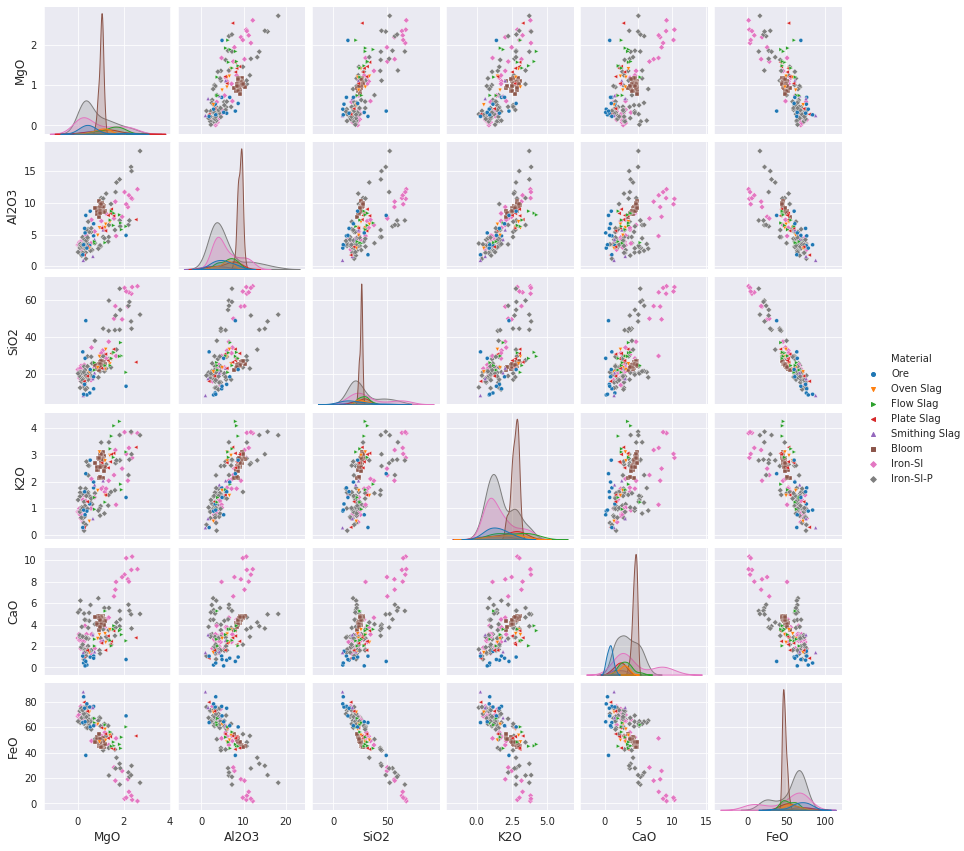

In [34]:
#pairplot matrix using a distibrution histogram of select main compounds 
#you can use th df ms_nor for al the subsamples or df_samples for only one value for sample 
icon = ["D", "D","s","o", "v","^", 
          "<", ">" ]
materials = ["Ore","Oven Slag",
             "Flow Slag","Plate Slag","Smithing Slag",
             "Bloom","Iron-SI","Iron-SI-P" ]

cf = ["Material", 'MgO', 'Al2O3', 'SiO2',
       'K2O', 'CaO', 'FeO']
df5 = ms_nor[cf]
sns.set_style("darkgrid")
g = sns.pairplot(df5, hue="Material", height = 2, aspect = 1, markers = icon, hue_order = materials)
g.legend.set_bbox_to_anchor((1, 0.5))
g.savefig('./plots/main_matrix.png', dpi = 200)

In [35]:
# Trace elements by LA-ICP-MS 
la_ms = pd.read_csv("./la_trace_samples.csv", sep= ",",decimal = ".", na_values='-') 
mask_la = (la_ms["Material"] == "Sandstone")
la_ms= la_ms.drop(index = la_ms.loc[mask_la].index).reset_index(drop = True)
df = la_ms

In [36]:
#bar plots
features = list(df.columns)
features.remove("Sample")
features.remove("Site")
features.remove("Material")
ele = []
for e in features:
    if not ("/" in e):
        ele.append(e)
elements=ele

materials = ["Ore","Oven Slag",
             "Flow Slag","Plate Slag","Smithing Slag",
             "Bloom","Iron-SI","Iron-SI-P" ]
el = "Y"
for el in elements:
    fig, ax = plt.subplots(1, figsize=(16,8))
    grouped = df[[el, "Material", "Sample"]].groupby("Material")
    #for name, group in grouped:
    for mat in materials:
        group = grouped.get_group(mat)
        x = group["Sample"] # problems with multisamples
        y = group[el] 
        ax.bar(x, y, label = group["Material"].iloc[0])
        ax.set_title(el)  
        ax.axes.xaxis.set_ticklabels([])  
    ax.legend()
    fig.savefig("./plots/bar_trace/"+el+".png", dpi = 200)
    plt.close(fig)

In [37]:
# box plots 
features = list(df.columns)
features.remove("Sample")
features.remove("Site")
features.remove("Material")
ele = []
for e in features:
    if not ("/" in e):
        ele.append(e)
elements=ele

mats = ["Ore","Oven Slag",
             "Flow Slag","Plate Slag","Smithing Slag",
             "Bloom","Iron-SI","Iron-SI-P" ]
new_mats = ["Ore","Oven S.",
             "Flow S.","Plate S.","Smith. S.",
             "Bloom","Iron-SI","Iron-SI-P"]

for el in elements:
    fig, ax = plt.subplots(1, figsize=(12,8))
    sns.swarmplot(x = "Material", y = el, data = df[["Material", el]].replace(mats, new_mats), ax= ax, palette= "dark")
    sns.boxplot(x = "Material", y = el, data = df[["Material", el]].replace(mats, new_mats), palette= "pastel", ax = ax)
    sns.set_style("whitegrid")
    ax.set_xlabel("")
    ax.set_ylabel(el, fontsize=18)
    plt.tight_layout()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=16)
    fig.savefig("./plots/box_trace/"+el.replace(" (%)", "")+".png", dpi=200)
    plt.close(fig)

/home/marisa/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/marisa/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/marisa/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/marisa/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/marisa/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/marisa/.l

In [38]:
#Biplots Trace
trace=['La','Y', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Er', 'Yb', 'Th', 'U']

materials = ["Ore","Oven Slag",
             "Flow Slag","Plate Slag","Smithing Slag",
             "Bloom","Iron-SI", "Iron-SI-P"]
colors = ["dodgerblue","darkred","forestgreen",
          "darkorange","violet","yellow",
          "silver", "darkblue"]
icon = ["o", "v", "^", 
          "<", ">", "s",
          "D", "D"]

combs = it.combinations(trace, 2)
    
        
for c in combs:
    fig, ax = plt.subplots(figsize=(14,10))
    s1 = c[0]
    s2 = c[1]
    x  = df[s1].values
    y  = df[s2].values
    for mat, co, i in zip(materials, colors, icon):
        mask = df["Material"] == mat
        ax.plot(x[mask], y[mask], label = mat, color = co, marker=i, linewidth=0, markersize = 5)
    ax.set_xlabel(s1 +" "+"(ppm)")
    ax.set_ylabel(s2 +" "+ "(ppm)")    
    sns.set_style("darkgrid")
    ax.legend()
    plt.tight_layout()
    fig.savefig("./plots/biplots_trace/"+s1+"_"+s2+".png", dpi = 200)
    plt.close(fig)

In [39]:
#linear regresion biplots of trace elements 
regresion = [("Hf","Zr"),("Ce","La"),("Th","U"),("Yb","Ce"),("Eu","Sm"),("Ce","Th"),("Nb","Y"),
            ("La","Sc")]
parameters = pd.DataFrame(columns = ["x","y","slope", "intercept", "R2"] )


materials = ["Ore","Oven Slag",
             "Flow Slag","Plate Slag","Smithing Slag",
             "Bloom","Iron-SI", "Iron-SI-P"]
colors = ["dodgerblue","darkred","forestgreen",
          "darkorange","violet","yellow",
          "silver", "darkblue"]
icon = ["o", "v", "^", 
          "<", ">", "s",
          "D","D"]
for r in regresion:
    fig, ax = plt.subplots(1, figsize=(15,7))
    e1 = r[0]
    e2 = r[1]
    x = df[e1].values
    y = df[e2].values
    for mat, c, i in zip(materials, colors, icon):
        df.loc[df["Material"]== mat].plot.scatter(e1, e2, label = mat, ax = ax,color = c,marker=i, s = 70,
                                                   edgecolors = "k")
    ax.legend()
    slope, intercept, r, p, se = stats.linregress(x, y)
    ax.plot(x, intercept + slope*x, 'r', label='fitted line',  linewidth=1.5)
    row = [e1, e2, slope, intercept, r**2]
    sns.set_style("darkgrid")
    row = pd.Series(row, index = parameters.columns)
    parameters = parameters.append(row, ignore_index=True)
    fig.savefig("./plots/regresion_trace/"+e1+e2+".png")
    plt.close(fig)

# Hf-Zr, Ce-La, Th-U, yb-ce, eu-sm, ce-th, la-sb, nb-y,

parameters.to_csv("./plots/regresion_trace/results_regresion_trace.csv",index = False)

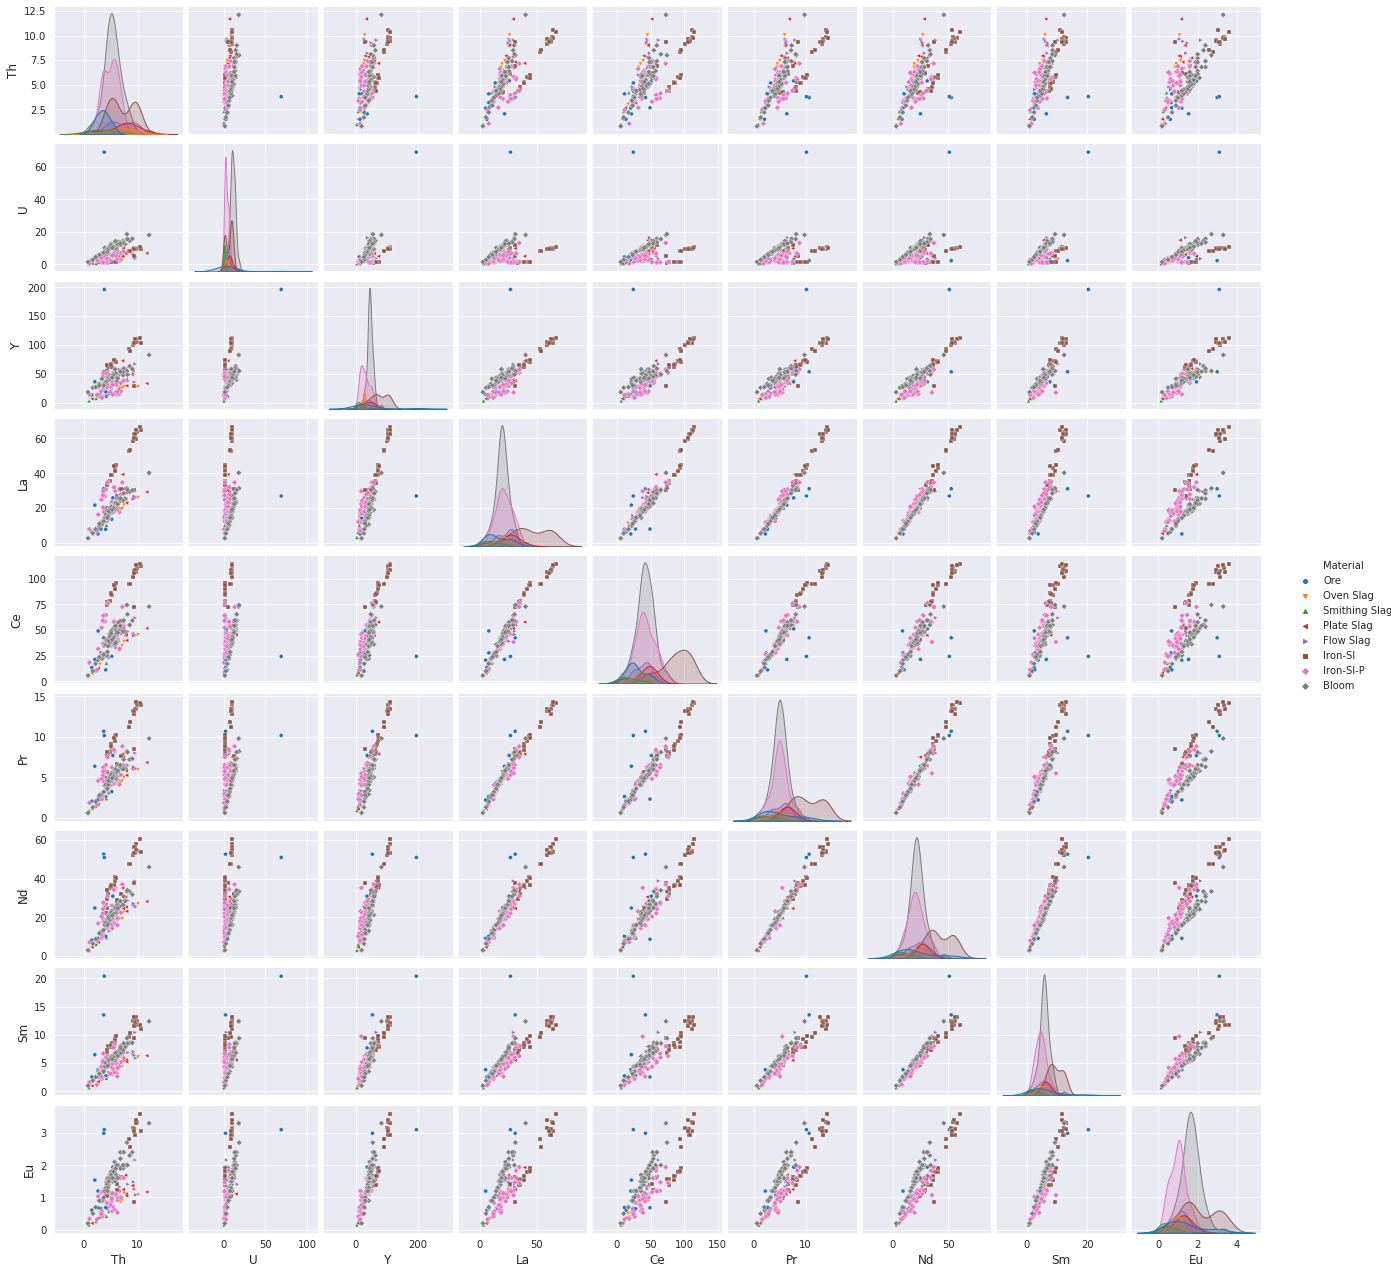

In [40]:
#pair scattermatrix plot of trace selected trace elements. 
icon = ["o", "v", "^", 
          "<", ">", "s",
          "D", "D"]
cs = ["Material", 'Th', 'U','Y','La', 'Ce', 'Pr', 'Nd', "Sm", 'Eu']
df2 = df[cs]
sns.set_style("darkgrid")

t = sns.pairplot(df2, hue="Material", height = 2, aspect = 1, markers = icon)
t.legend.set_bbox_to_anchor((1, 0.5))
t.savefig('./plots/trace_matrix.png', dpi = 200)

In [41]:
# Calculation and addesion of Ce and Eu anomalie
la_norm = 30
pr_norm = 7.1
ce_norm = 64
eu_norm = 0.88
sm_norm = 4.5
gd_norm = 3.8

df["Ce*"] = (df["Ce"]/ce_norm)/(0.5* ((df["La"]/la_norm)+(df["Pr"]/pr_norm)))
df["Eu*"] = (df["Eu"]/eu_norm)/(0.5*((df["Sm"]/sm_norm)+(df["Gd"]/gd_norm)))  
df_anomalie = df

df_anomalie.to_csv("./results/df_Trace_anomalie.csv",index = False, float_format="{:0.3f}".format)



In [42]:
#Descriptive statitisc by Materials of Trace elements
results_trace_material = df_anomalie.groupby(['Material'], as_index = False).agg(['mean', "min", "max", "std"])
results_trace_material = results_trace_material.stack(level = 1).reset_index().rename(columns = {"level_1": "type"})
results_trace_material.to_csv("./results/ds_results_trace_material.csv", sep = ";",float_format="{:0.3f}".format)
#Descriptive statitisc by all the sample set of trace 
df_la_sample=df_anomalie.groupby(['Sample', "Material"], as_index = False).mean()# to create a df with only one value per
df_la_sample.to_csv("./results/sample_results_trace_.csv", sep = ";",float_format="{:0.3f}".format) 
results_trace_full=df_la_sample.apply({e:['mean', "min", "max", "std"] for e in elements})
results_trace_full.to_csv("./results/ds_results_trace_main.csv", sep = ";",float_format="{:0.3f}".format)


In [43]:
#Chronological data of the samples 
chronology ={"Phases": ["I","II","III","IV",], 
            "Chronology": ["20BC - 20AD", "20AD - 100AD","100AD - 150AD", "150AD -275AD"], 
            "Samples": [15, 9,5,5]
            } 
dfc = pd.DataFrame(chronology, columns = ["Phases", "Chronology", "Samples"])
dfc


,Phases,Chronology,Samples
0,I,20BC - 20AD,15
1,II,20AD - 100AD,9
2,III,100AD - 150AD,5
3,IV,150AD -275AD,5


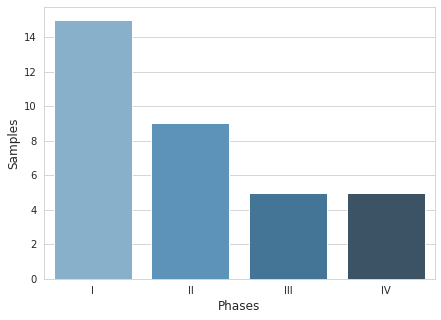

In [44]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x= dfc["Phases"], y= dfc["Samples"], palette="Blues_d", ax = ax)
fig.savefig("./plots/bar_chronology.png", bbox_inches="tight", dpi=300)